### Hypothesis tests

Task 1:
Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students 
from a Dublin secondary school.
For task 1, we want to test the hypothesis that the teacher's suspicion that the average is below the national average of 70%. So, in this case, we want to analyze two averages of the same population.

The first step is to analyze if it is different from the population average and for this, it is important to choose an appropriate statistical test.
 Defining hypothesis:
 1. State the Null Hypothesis $H_0: \mu = 70$
 2. Alternative Hypothesis $H_A: \mu \neq 70$

Before choosing the appropriate hypothesis test, it is necessary to test the normality of the data distribution. In some statistical tests, if the distribution of data, errors or differences is not normal, it is necessary to do some kind of transformation or use a non-parametric version (Mello, 2012). Verifying normality of distribution is a requirement for running several of the well-known statistical tests such as Student’s t-test and ANOVA (Biostats, n.d.). ndings.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats as stats
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv("Q1.csv")

In [28]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


In [30]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


cheking histogram
primeiro vamos verificar se df tem normal distribution.


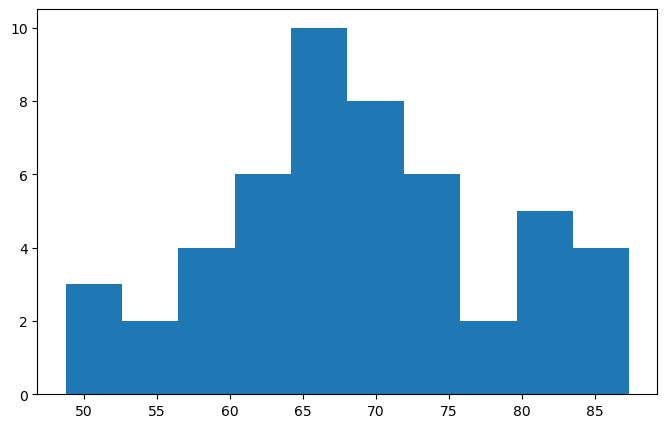

In [32]:
plt.figure(figsize=(8,5))
plt.hist(df['exam_score'])
plt.show()
#sns.displot(df['exam_score'], kde=True, color='skyblue')

De acordo com o histograma, os dados parecem ter uma distribuicao normal, mas confirmar isso, iremos realiza um teste estatistico para verificar.


Temos 4 principais Testes de Normalidade 
1. Shapiro-Wilk; 
2. Kolmogorov-Smirnov;
3. Lilliefors; 
4. Anderson-Darlin
   1. Shapiro-Wilk
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed(Malato, 2023).
    2. Kolmogorov-Smirnov
This test compares the ECDF (empirical cumulative distribution function) of your sample data with the distribution expected if the data were normal. If this observed difference is adequately large, the test will reject the null hypothesis of population normality. If the p-value of this test is less than your chosen α, you can reject your null hypothesis and conclude that the population is nonnormal (support.minitab.com, n.d.).
    3. Lilliefors
The Lilliefors test is a variant of the Kolmogorov-Smirnov test that is specifically designed to test normality. It evaluates whether the data comes from a normal distribution by comparing the empirical distribution function of the data with the expected normal cumulative distribution function (RCODER, 2023).
    4. 
The Anderson-Darling test has a similar objective to that of the Kolmogorov-Smirnov test, but it is more powerful. This is so since all the data values are considered, not just the one that produces the maximum difference. Also, more weight is given to the tails of the distribution being fitted. Generally, this test should be used instead of the Kolmogorov-Smirnov test (Real-statistics.com, 2024).


The Shapiro–Wilk test is more appropriate method for small sample sizes (<50 samples) although it can also be handling on larger sample size while Kolmogorov–Smirnov test is used for n ≥50. For both of the above tests, null hypothesis states that data are taken from normal distributed population. When P > 0.05, null hypothesis accepted and data are called as normally distributed (Mishra et al., 2019).

The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution(Zach, 2020)

In [33]:
from  scipy.stats import shapiro
stat, p = shapiro(df['exam_score'])
print ('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
    print('normal distribution')
else:
    print('Not a normal distribution')

stat=0.98, p=0.655649244785308837890625000000
normal distribution


Since the p-value is not less than 0.05, we fail to reject the null hypothesis, So the data comes from a normal distribution.
with that we can choose the test of hipothesis

Identify outliers

<Axes: >

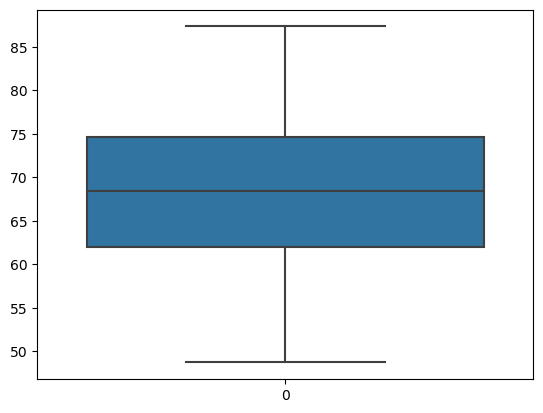

In [35]:
sns.boxplot(df['exam_score'])

In [36]:
df['exam_score'].mean()

68.73559999999999

    
    The sample mean is different from 70, but this is not sufficient evidence to prove that the population mean is not 70! 

Use a one-sample t test to compare a sample mean to a reference value. It allows you to determine whether the population mean differs from the reference value. The reference value is usually highly relevant to the subject area(Frost, n.d.).

Considering that we have a normal distribution a one-sample t-test can be used.
 .

Perform a Hypothesis:

1. State the null $H_0: \mu = 70$ vs $H_A: \mu \neq 70$

the level of significance $\alpha$ = 0.05

### One-Sample T-test

In [47]:
t_stat, p_value=stats.ttest_1samp(df['exam_score'], popmean= 70)

print('t-statistic:', t_stat)
print('p-value:', p_value)


if p_value < 0.05:
    print("Reject null hypothesis. The mean performance is significantly different from the national average.")
else:
    print("Fail to reject null hypothesis. The mean performance is not significantly different from the national average.")

t-statistic: -0.9169771399834613
p-value: 0.36364597032062806
Fail to reject null hypothesis. The mean performance is not significantly different from the national average.


The p-value = 0.36

If the p-value is $<$ $\alpha$, we reject the $H_0$, if the p-value is $\nless$ $\alpha$ then we fail to reject the $H_0$

Note in this case p-value is great than significance level $\alpha$, so we faill to reject the null-hypothesis. The difference between the sample mean and the population mean value is not statistically significant.

### Calculation manually


In [38]:

# assign the variables (metrics for ttest) and values
xbar = df['exam_score'].mean() # sample mean 
mu = 70 # The expected mean or (population mean)
s = statistics.stdev(df['exam_score']) # standard deviation 
n = len(df['exam_score']) # the sample size


print("The test Statistic: ", (xbar - mu) / (s / math.sqrt(n)))

The test Statistic:  -0.9169771399834615


In [50]:
from scipy.stats import t

#Degrees of freedom
df = 50 - 1

# significance level
alpha = 0.05

# Critical value of the t-test (two-tailed)
t_critical = t.ppf(1 - alpha/2, df)

print("Critical value (two-tailed):", t_critical)


Critical value (two-tailed): 2.009575234489209


Critical value is a cut-off value that is used to mark the start of a region where the test statistic, obtained in hypothesis testing, is unlikely to fall in. In hypothesis testing, the critical value is compared with the obtained test statistic to determine whether the null hypothesis has to be rejected or not(CueMath, n.d.).

A two-tailed test, there will be two critical values. In this case, the T critical values are 2.0095 and -2.0095. If the T statistic is less than the critical value, we fail to reject the null hypothesis, otherwise if it is higher we accept the alternative hypothesis.

In [55]:
# Test statistic
t_statistic = -0.9169771399834615

# Comparison with the critical value
if abs(t_statistic) > t_critical:
    print("We reject the null hypothesis. The sample mean is significantly different from the national mean.")
else:
    print("We do not reject the null hypothesis. There is not enough evidence to conclude that the sample mean is different from the national mean.")


We do not reject the null hypothesis. There is not enough evidence to conclude that the sample mean is different from the national mean.


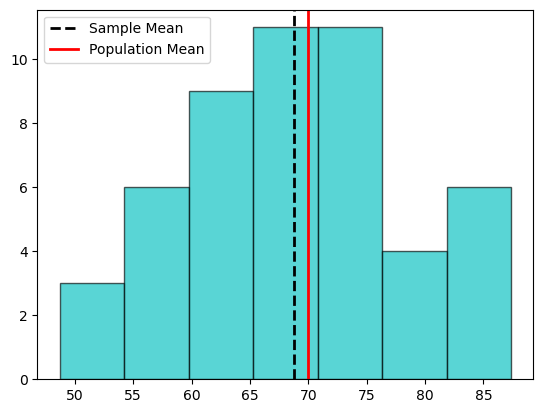

In [39]:
import matplotlib.pyplot as plt


result = plt.hist(df['exam_score'], bins=7, color="c", 
                  edgecolor="k", alpha=0.65)

# Add in the population mean and the sample mean
plt.axvline(df['exam_score'].mean(), color="k", linestyle="dashed", 
            linewidth=2,  label='Sample Mean')# this is the verticle line parameters

plt.axvline(mu, color="red", linestyle="solid", 
            linewidth=2, label='Population Mean')# the pop mean 
plt.legend()

plt.show()

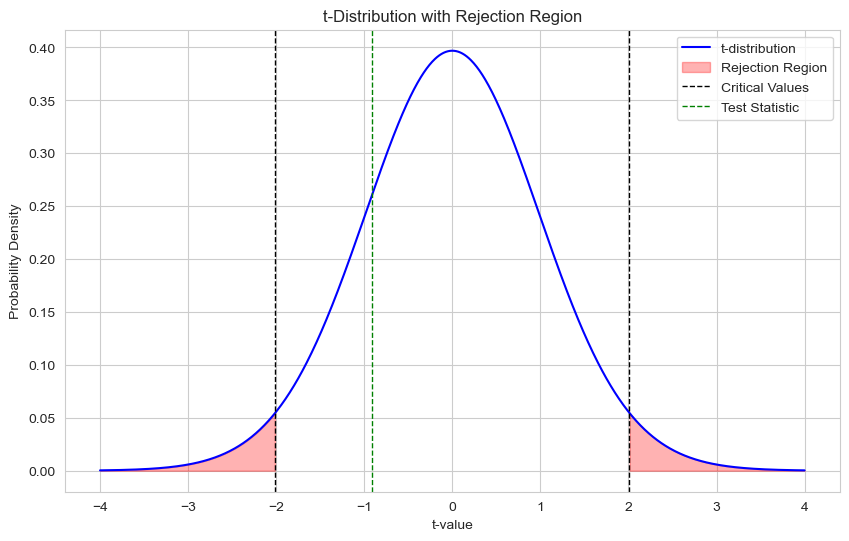

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Degrees of freedom
df = 50 - 1

# Significance level
alpha = 0.05

# Critical value of the t-test (two-tailed)
t_critical = stats.t.ppf(1 - alpha/2, df)

# Range for the t-statistic
t_values = np.linspace(-4, 4, 1000)

# t-distribution
t_dist = stats.t.pdf(t_values, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(t_values, t_dist, 'b-', label='t-distribution')

# Shade the rejection regions
plt.fill_between(t_values, 0, t_dist, where=(t_values < -t_critical), color='red', alpha=0.3, label='Rejection Region')
plt.fill_between(t_values, 0, t_dist, where=(t_values > t_critical), color='red', alpha=0.3)

# Plot the critical values
plt.axvline(-t_critical, color='black', linestyle='--', linewidth=1)
plt.axvline(t_critical, color='black', linestyle='--', linewidth=1, label='Critical Values')

# Plot the test statistic
plt.axvline(t_statistic, color='green', linestyle='--', linewidth=1, label='Test Statistic')

# Add labels and legend
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('t-Distribution with Rejection Region')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


With the graph, we can see that the T statistic is outside the rejection zone since it has a value of -0.9169771399834615.

References

Frost, J. (n.d.). T Test Overview: How to Use & Examples. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/hypothesis-testing/t-test/ [Accessed 10 May 2024].

Zach (2020). How to Perform a Shapiro-Wilk Test in Python. [online] Statology. Available at: https://www.statology.org/shapiro-wilk-test-python/ [Accessed 10 May 2024].

Mello, M. (2012). Qual teste estatístico devo usar? [online] Sobrevivendo na Ciência. Available at: https://marcoarmello.wordpress.com/2012/05/17/qualteste/ [Accessed 11 May 2024].

Biostats. (n.d.). Test for normality – Shapiro-Wilk test – bioST@TS. [online] Available at: https://biostats.w.uib.no/test-for-normality-shapiro-wilks-test/ [Accessed 11 May 2024].

Malato, G. (2023). An Introduction to the Shapiro-Wilk Test for Normality | Built In. [online] builtin.com. Available at: https://builtin.com/data-science/shapiro-wilk-test [Accessed 11 May 2024].

RCODER. (2023). Lilliefors normality test in R. [online] Available at: https://r-coder.com/lilliefors-test-r/ [Accessed 11 May 2024].

Real-statistics.com. (2024). One-Sample Anderson-Darling Test. [online] Available at: https://real-statistics.com/non-parametric-tests/goodness-of-fit-tests/anderson-darling-test/ [Accessed 11 May 2024].

Mishra, P., Pandey, C.M., Singh, U., Sahu, C., Keshri, A. and Gupta, A. (2019). Descriptive Statistics and Normality Tests for Statistical Data. Annals of Cardiac Anaesthesia, [online] 22(1), pp.67–72. doi:https://doi.org/10.4103%2Faca.ACA_157_18.

CueMath (n.d.). Critical Value - Formula, Definition, Examples, Types. [online] Cuemath. Available at: https://www.cuemath.com/data/critical-value/ [Accessed 11 May 2024].